<h2>Optimisation M1 - TP2</h2>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

On considère la fonction quadratique suivante définie sur $[-5,5]\times[-5,5]$ par :
$$
f(x) = x_0^2 + 2 x_1^2 + x_0x_1 + x_0 - x_1 + 20.
$$

1) Ecrire en Python la fonction $f$, son gradient ainsi que la matrice symétrique $A$ et le vecteur $b$ tels que 
$$
f(x) = \frac12 \langle Ax, x\rangle - \langle b, x \rangle + c.
$$

In [2]:
def f(x):
    return x[0]**2 + 2*x[1]**2 + x[0]*x[1] + x[0] - x[1] + 20
def gradf(x):
    gx = 2*x[0] + x[1] + 1
    gy = 4*x[1] + x[0] - 1
    return np.array([gx, gy]) # on renvoie un objet de type array afin de pouvoir faire des opérations de maths ensuite
A, b = np.array([[2, 1], [1, 4]]), np.array([-1, 1]) # calculer par identification
dom = [-5, 5, -5, 5]

2) Tracer les lignes de niveau de $f$ sur son domaine de définition

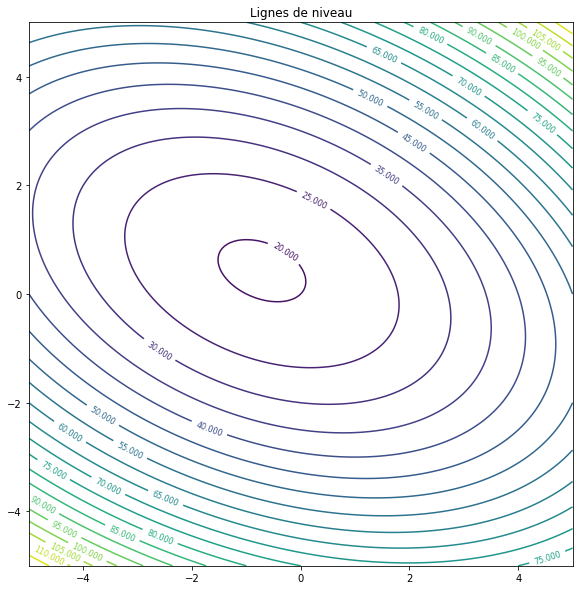

In [3]:
# Definition des grilles et evaluation de f
X, Y = np.linspace(dom[0], dom[1], 200), np.linspace(dom[2], dom[3], 200)
X, Y = np.meshgrid(X, Y)
Z = f([X, Y])

# Graphique des lignes de niveaux
fig, ax = plt.subplots(figsize = (10, 10))
CS = ax.contour(X, Y, Z, 20)
ax.clabel(CS, fontsize = 8)
ax.set_title('Lignes de niveau')
ax.set_aspect('equal', adjustable = 'box') # pour que les axes aient la même échelle

<h3>I) Algorithme de descente de gradient à pas optimal</h3>

3) Ecrire une fonction $\mbox{descente_gradient_pas_optimal}$, qui prend en argument un point de départ $x^{(0)}$, la matrice $A$, le vecteur $b$ et une tolérance $\varepsilon$, qui représente l'algorithme de descente de gradient à pas optimal. Cette fonction renverra le point final obtenu ainsi que la liste des itérés.

In [ ]:
def descente_gradient_pas_optimal(x0, A, b, epsilon):
    # algorithme de descente de gradient à pas optimal pour une fonctionnelle quadratique
    x = x0
    x_list = [x0]
    gx = np.dot(A, x) - b # gradient de f pour une fonctionnelle quadratique
    while np.linalg.norm(gx) > epsilon:
        t = np.dot(gx, gx)/np.dot(np.dot(A, -gx), -gx) # valeur du pas optimal pour une fonctionnelle quadratique
        x = x - t*gx
        x_list.append(x)
        gx = np.dot(A, x) - b # on calcule le nouveau gradient
    
    return x, x_list

4) On prendra $x^{(0)}=(4,-4)$. Supperposer la trajectoire donnée par l'algorithme au graphe des lignes de niveau de $f$. Commenter la trajectoire.

5) Illustrer la convergence linéaire de l'algorithme.

<h3>II) Algorithme de descente de gradient par rebroussement</h3>

6) Ecrire une fonction $\mbox{rebroussement}$ qui prend en argument un point $x$, la fonction $f$, une direction de descente $d$, le produit scalaire $\langle \nabla f(x), d\rangle$, $\alpha$ et $\beta$, et qui représente l'algorithme de calcul d'un pas de descente par méthode de rebroussement. On veillera à évaluer le moins possible la fonction $f$.

7) Ecrire une fonction $\mbox{descente_gradient_par_rebroussement}$, qui prend en argument un point de départ $x^{(0)}$, $f$, le gradient de $f$, $\alpha$, $\beta$ et une tolérance $\varepsilon$, et qui représente l'algorithme de descente de gradient par rebroussement. On veillera à évaluer le moins possible de fois le gradient de $f$.

8) On prendra $x^{(0)}=(4,-4)$. Supperposer la trajectoire donnée par l'algorithme prédédent au graphe des lignes de niveau de $f$. Commenter la trajectoire. On pourra éventuellement également supperposer la trajectoire donnée par l'algorithme de descente de gradient à pas optimal.

9) Illustrer la convergence de l'algorithme de descente de gradient par rebroussement. On supperposera avec le graphe illustrant la convergence de l'algorithme de descente de gradient à pas optimal.